Importowanie bibliotek

In [1]:
#!/usr/bin/env python3
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline 
import seaborn as sns

Przetwarzanie zbioru danych:
    - importowanie
    - wyznaczenie kolumny klas 'target'
    - konwersja klas na wartości binarne

In [2]:
df = pd.read_csv('dane_dm/spam.dat')
print(df.info())
print(df['target'].value_counts())
properties = list(df.columns.values)
properties.remove('target')
X = df[properties]
Y = df['target']
y = Y.replace(to_replace=['no', 'yes'], value=[0, 1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Columns: 463 entries, ACT_NOW to target
dtypes: int64(462), object(1)
memory usage: 16.9+ MB
None
no     2949
yes    1840
Name: target, dtype: int64


Podzielenie zbioru na testujący i trenujący

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Utworzenie klasyfikatora MLP o wymiarze warstwy ukrytej 100x100x100, liczbie iteracji = 50

In [4]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

Trenowanie klasyfikatora i przedstawienie jakości

In [5]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

Iteration 1, loss = 0.67650018
Iteration 2, loss = 0.66847183
Iteration 3, loss = 0.66009317
Iteration 4, loss = 0.65249131
Iteration 5, loss = 0.64567691
Iteration 6, loss = 0.63922381
Iteration 7, loss = 0.63311598
Iteration 8, loss = 0.62679249
Iteration 9, loss = 0.62034175
Iteration 10, loss = 0.61358129
Iteration 11, loss = 0.60624603
Iteration 12, loss = 0.59845384
Iteration 13, loss = 0.58990900
Iteration 14, loss = 0.58055458
Iteration 15, loss = 0.57032478
Iteration 16, loss = 0.55902183
Iteration 17, loss = 0.54643794
Iteration 18, loss = 0.53274138
Iteration 19, loss = 0.51778874
Iteration 20, loss = 0.50144565
Iteration 21, loss = 0.48379046
Iteration 22, loss = 0.46508649
Iteration 23, loss = 0.44528839
Iteration 24, loss = 0.42468462
Iteration 25, loss = 0.40345719
Iteration 26, loss = 0.38216025
Iteration 27, loss = 0.36096508
Iteration 28, loss = 0.34030363
Iteration 29, loss = 0.32030147
Iteration 30, loss = 0.30133010
Iteration 31, loss = 0.28345000
Iteration 32, los

/home/student/Pulpit/aied/aied/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Wyświetlenie macierzy konfusji klasyfikatora

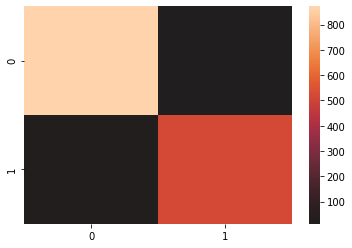

In [6]:
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, center=True)
plt.show()